Libraries Imported

In [80]:
import numpy as np
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [81]:
import pandas as pd

In [82]:
df = pd.read_csv("age_gender.csv")

Data pre-processing

In [83]:
df

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [84]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,23705.0,33.300907,19.885708,1.0,23.0,29.0,45.0,116.0
ethnicity,23705.0,1.269226,1.345638,0.0,0.0,1.0,2.0,4.0
gender,23705.0,0.477283,0.499494,0.0,0.0,0.0,1.0,1.0


In [85]:
df = df.drop('ethnicity',axis=1)

C:\Users\gs180\AppData\Local\Temp\ipykernel_18860\3208194670.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

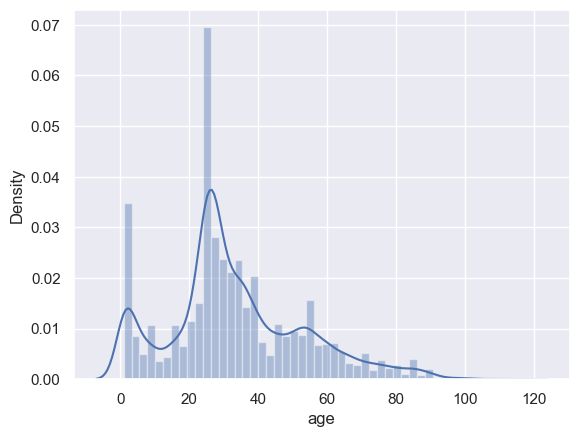

In [86]:
import seaborn as sns
sns.distplot(df['age'])

In [87]:
def convert_pixels(x):
    return np.array(x.split(' '), dtype=np.float32).reshape(48, 48)

df['pixels'] = df['pixels'].map(convert_pixels)

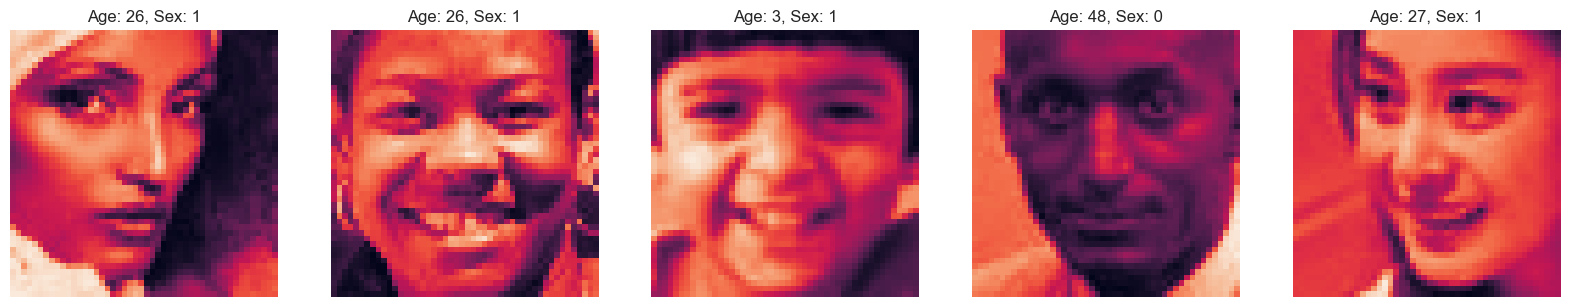

In [88]:
import matplotlib.pyplot as plt 
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i in range(5):
    random_face = np.random.choice(len(df))

    age = df['age'][random_face]
    gender = df['gender'][random_face]

    axes[i].set_title('Age: {0}, Sex: {1}'.format(age, gender))
    axes[i].imshow(df['pixels'][random_face])
    axes[i].axis('off')

In [89]:
X = np.array(df['pixels'].to_list())
X_reshaped = X.reshape(X.shape[0], 48, 48, 1)

In [90]:
if np.max(X_reshaped) > 1:
     X_reshaped = X_reshaped / 255

In [91]:
input_shape = X_reshaped.shape[1:]

n_epochs = 15
batch_size = 64

In [92]:
y = df['age'].values

Age Model Development

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [94]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
age_model = Sequential()

age_model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(BatchNormalization())

age_model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.3))
age_model.add(BatchNormalization())

age_model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.3))
age_model.add(BatchNormalization())

age_model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.5))
age_model.add(BatchNormalization())

age_model.add(Flatten())
age_model.add(Dense(128, activation='relu'))
age_model.add(Dropout(0.4))
age_model.add(Dense(1))

age_model.compile(optimizer='adam', loss='mse')

age_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_15 (Bat  (None, 23, 23, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_23 (Conv2D)          (None, 23, 23, 64)        36928     
                                                                 
 conv2d_24 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 10, 10, 64)      

In [95]:
callbacks = [EarlyStopping(patience=4, monitor='val_loss', mode='min'),
             ReduceLROnPlateau(patience=2, verbose=1)]

In [96]:
history = age_model.fit(X_train, y_train,
                        epochs=n_epochs,
                        batch_size=batch_size,
                        callbacks=callbacks,
                        validation_data=(X_test, y_test))

Epoch 1/15
297/297 [==============================] - 153s 472ms/step - loss: 317.7537 - val_loss: 2151.6028 - lr: 0.0010
Epoch 2/15
297/297 [==============================] - 130s 436ms/step - loss: 158.0930 - val_loss: 1822.6552 - lr: 0.0010
Epoch 3/15
297/297 [==============================] - 131s 441ms/step - loss: 133.9245 - val_loss: 648.3466 - lr: 0.0010
Epoch 4/15
297/297 [==============================] - 134s 453ms/step - loss: 124.8285 - val_loss: 453.3513 - lr: 0.0010
Epoch 5/15
297/297 [==============================] - 112s 378ms/step - loss: 116.5131 - val_loss: 131.9484 - lr: 0.0010
Epoch 6/15
297/297 [==============================] - 113s 382ms/step - loss: 107.6657 - val_loss: 95.5306 - lr: 0.0010
Epoch 7/15
297/297 [==============================] - 114s 383ms/step - loss: 108.0222 - val_loss: 389.4060 - lr: 0.0010
Epoch 8/15
297/297 [==============================] - ETA: 0s - loss: 97.2984
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0001000000047497451

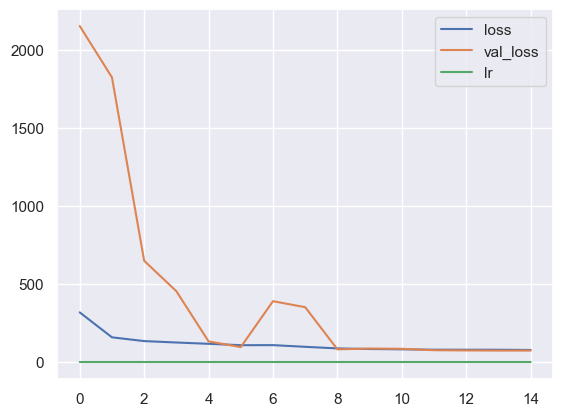

In [97]:
pd.DataFrame(history.history).plot();

In [98]:
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report
print("MAE: {}".format(mean_absolute_error(y_test, y_pred)))

MAE: 6.257844223902714


In [99]:
y_pred = age_model.predict(X_test)

  1/149 [..............................] - ETA: 27s

149/149 [==============================] - 6s 42ms/step


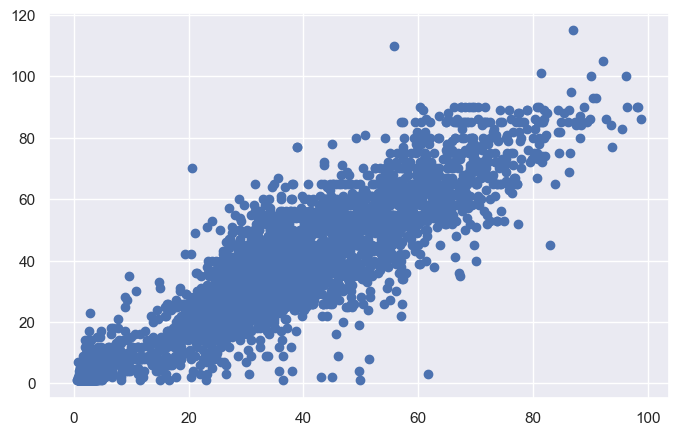

In [100]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, y_test);

Gender Model

In [101]:
y = df['gender'].values
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [102]:
gender_model = Sequential()

gender_model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
#gender_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(Dropout(0.4))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
gender_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(Dropout(0.5))
gender_model.add(BatchNormalization())

gender_model.add(Flatten())

gender_model.add(Dense(64, activation='relu'))
gender_model.add(Dropout(0.4))

gender_model.add(Dense(1, activation='sigmoid')) #For binary classification activation function is sigmoid 

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #...and loss function is binary_crossentropy

gender_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_19 (Bat  (None, 23, 23, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                      

In [103]:
callbacks = [EarlyStopping(patience=4, monitor='val_accuracy', mode='max'), 
              ReduceLROnPlateau(patience=2, verbose=1)]

In [104]:
history = gender_model.fit(X_train, y_train, 
                           epochs=n_epochs,
                           batch_size=batch_size,
                           callbacks=callbacks,
                           validation_data=(X_test, y_test))

Epoch 1/15


297/297 [==============================] - 66s 216ms/step - loss: 0.5726 - accuracy: 0.7179 - val_loss: 0.9654 - val_accuracy: 0.5206 - lr: 0.0010
Epoch 2/15
297/297 [==============================] - 1009s 3s/step - loss: 0.4100 - accuracy: 0.8124 - val_loss: 0.3652 - val_accuracy: 0.8323 - lr: 0.0010
Epoch 3/15
297/297 [==============================] - 81s 271ms/step - loss: 0.3642 - accuracy: 0.8355 - val_loss: 0.3908 - val_accuracy: 0.8386 - lr: 0.0010
Epoch 4/15
297/297 [==============================] - 67s 224ms/step - loss: 0.3420 - accuracy: 0.8477 - val_loss: 0.3226 - val_accuracy: 0.8561 - lr: 0.0010
Epoch 5/15
297/297 [==============================] - 68s 229ms/step - loss: 0.3218 - accuracy: 0.8549 - val_loss: 0.3770 - val_accuracy: 0.8561 - lr: 0.0010
Epoch 6/15
297/297 [==============================] - 68s 228ms/step - loss: 0.3019 - accuracy: 0.8643 - val_loss: 0.2883 - val_accuracy: 0.8682 - lr: 0.0010
Epoch 7/15
297/297 [==============================] - 64s 217ms/

In [105]:
valid_score = gender_model.evaluate(X_test, y_test, verbose=1)
print('Accuracy for test set: {0}'.format(valid_score[1]))

149/149 [==============================] - 5s 32ms/step - loss: 0.2388 - accuracy: 0.8994
Accuracy for test set: 0.899388313293457


In [109]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
y_pred = (gender_model.predict(X_test) > 0.5).astype("int32")

149/149 [==============================] - 5s 33ms/step


In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2468
           1       0.88      0.92      0.90      2273

    accuracy                           0.90      4741
   macro avg       0.90      0.90      0.90      4741
weighted avg       0.90      0.90      0.90      4741



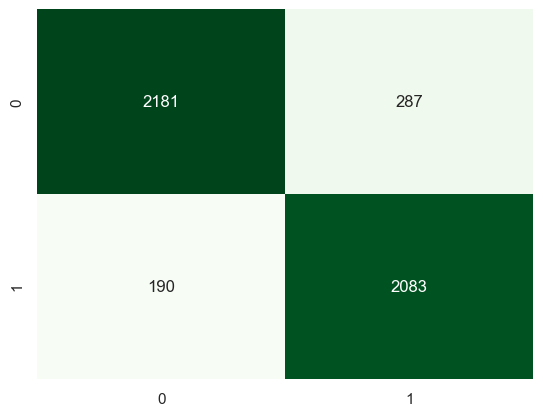

In [111]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Greens', cbar=False, annot=True, fmt='d');

In [112]:
y_pred = y_pred.reshape(y_pred.shape[0])

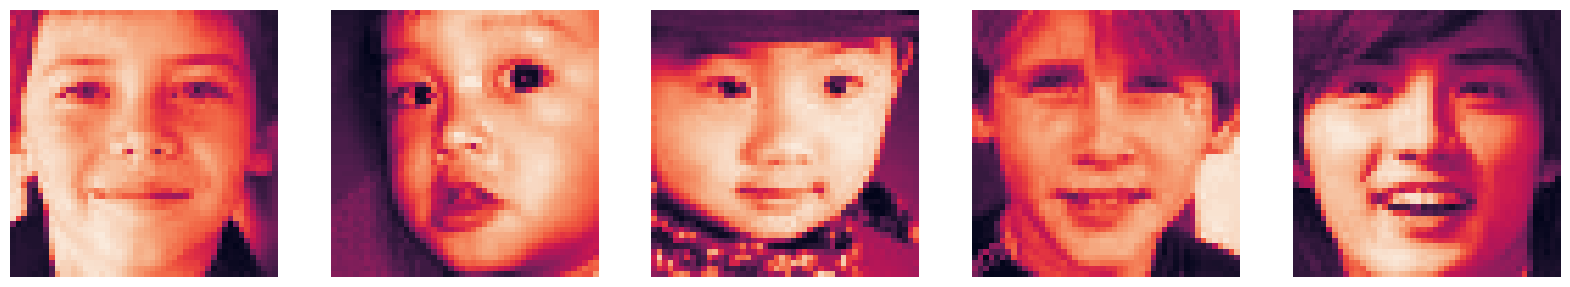

In [113]:
X_fp = X_test[(y_pred == 1) & (y_test == 0)] 

fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i in range(5):
    
    random_choice = np.random.choice(len(X_fp))
    
    axes[i].imshow(X_fp[random_choice].reshape(48, 48))
    axes[i].axis('off')

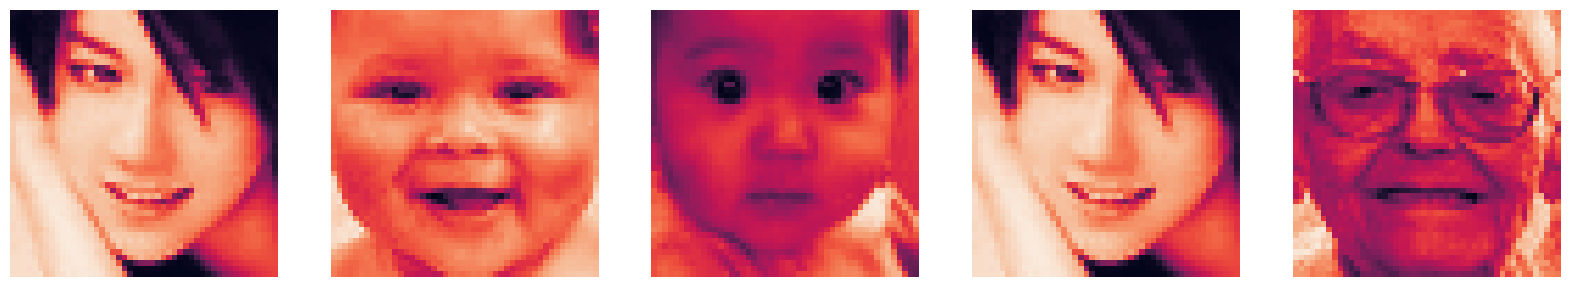

In [114]:
X_fn = X_test[(y_pred == 0) & (y_test == 1)]  

fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i in range(5):
    
    random_choice = np.random.choice(len(X_fn))
    axes[i].imshow(X_fn[random_choice].reshape(48, 48))
    axes[i].axis('off')

In [117]:
def face_prediction(image):
    x = image.reshape(1, 48, 48, 1)
    x = x / 255
    age_predict = int(age_model.predict(x))
    gender_predict = int(gender_model.predict_classes(x))
    gender = {0: 'Male', 1: 'Female'}    
    plt.imshow(image)
    plt.title('{0}, {1}'.format(age_predict, gender[gender_predict]))
    plt.axis('off')

Final testing

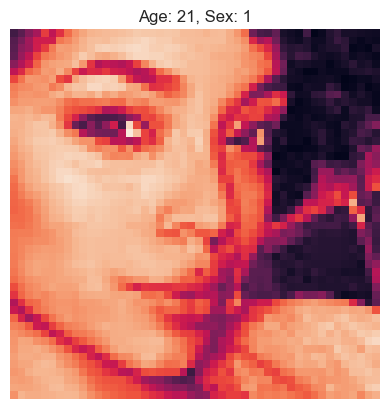

In [122]:
random_face = np.random.choice(len(df))

age = df['age'][random_face]
gender = df['gender'][random_face]

plt.imshow(df['pixels'][random_face])
plt.title('Age: {0}, Sex: {1}'.format(age, gender))
plt.axis('off');